In [ ]:
# Feature Importance with Extra Trees Classifier
# from pandas import read_csv
# from sklearn.ensemble import ExtraTreesClassifier

# # feature extraction
# model = ExtraTreesClassifier()
# model.fit(X, Y)
# print(model.feature_importances_)

In [ ]:
# from pandas import read_csv
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# # feature extraction
# model = LogisticRegression()
# rfe = RFE(model, 4)
# fit = rfe.fit(X, Y)
# print("Num Features: {}".format(fit.n_features_))
# print("Selected Features{}".format( fit.support_))
# print("Feature Ranking: {}".format(fit.ranking_))

In [3]:
import pandas as pd
import numpy as np
SalaryData=pd.read_csv('/content/Salaries.csv')
SalaryData.head(6)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000


#Understand the Data With: Descriptive Statistics

In [4]:
SalaryData.head()
shape = SalaryData.shape
print('Shape of the data is {}'.format(shape))
print('#######################')
print('Types of the variables are:')
print(SalaryData.dtypes)
print('#######################')
description = SalaryData.describe()
print('Summary of the data:')
print(description)
print('#######################')


# class_counts = SalaryData.groupby('class').size()
# print(class_counts)


correlations = SalaryData.corr(method='pearson')
print('Pearson correlation of the data')
print(correlations)
print('#######################')

skew = SalaryData.skew()
print('skewness of the data')
print(skew)

print('#######################')
print(SalaryData.columns)
names=SalaryData.columns.tolist()


Shape of the data is (397, 6)
#######################
Types of the variables are:
rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object
#######################
Summary of the data:
       yrs.since.phd  yrs.service         salary
count     397.000000   397.000000     397.000000
mean       22.314861    17.614610  113706.458438
std        12.887003    13.006024   30289.038695
min         1.000000     0.000000   57800.000000
25%        12.000000     7.000000   91000.000000
50%        21.000000    16.000000  107300.000000
75%        32.000000    27.000000  134185.000000
max        56.000000    60.000000  231545.000000
#######################
Pearson correlation of the data
               yrs.since.phd  yrs.service    salary
yrs.since.phd       1.000000     0.909649  0.419231
yrs.service         0.909649     1.000000  0.334745
salary              0.419231     0.334745  1.000000
##########

In [5]:
top_q=description['salary']['75%']
MAX=description['salary']['max']

#Understand Your Data With Visualization

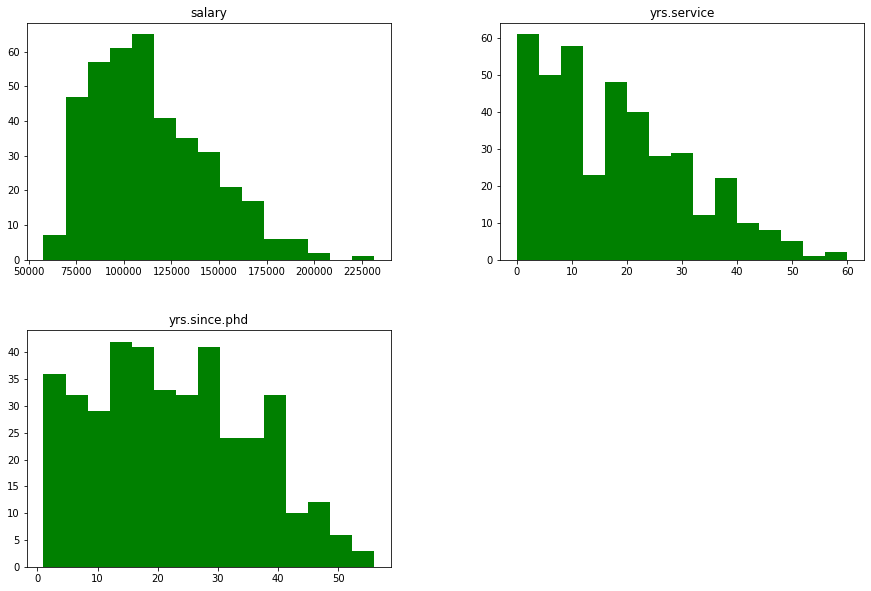

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 10]
SalaryData.hist( bins=15,grid=False,color='green')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The handle <BarContainer object of 36 artists> has a label of '_' which cannot be automatically added to the legend.


count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64


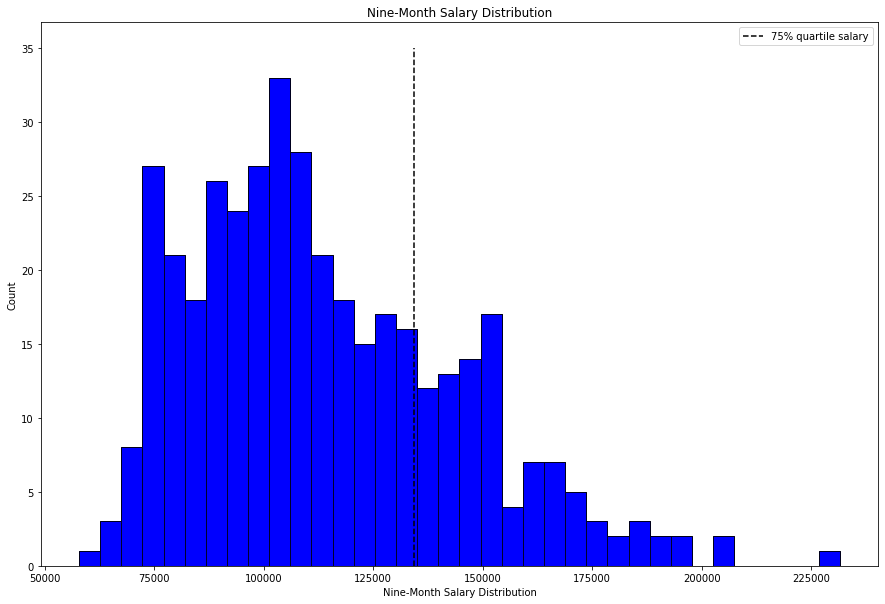

In [7]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(SalaryData['salary'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(SalaryData['salary'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title("Nine-Month Salary Distribution")
plt.xlabel('Nine-Month Salary Distribution')
plt.ylabel("Count")
plt.vlines(top_q,ymin=0,ymax=35,linestyles='dashed')

plt.legend(['75% quartile salary',"_", "_"])

print(SalaryData['salary'].describe())

count    397.000000
mean      22.314861
std       12.887003
min        1.000000
25%       12.000000
50%       21.000000
75%       32.000000
max       56.000000
Name: yrs.since.phd, dtype: float64


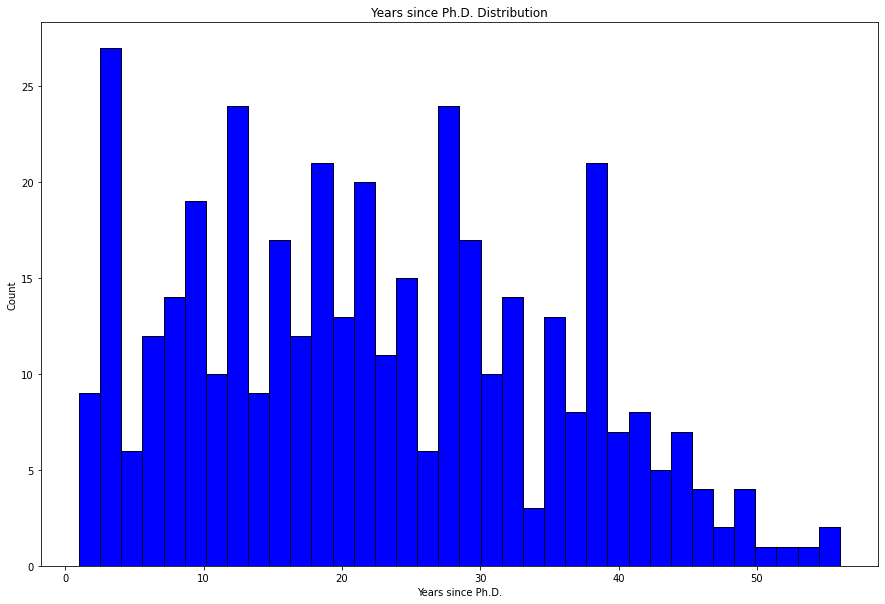

In [8]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(SalaryData['yrs.since.phd'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(SalaryData['yrs.since.phd'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title("Years since Ph.D. Distribution")
plt.xlabel("Years since Ph.D.")
plt.ylabel("Count")
print(SalaryData['yrs.since.phd'].describe())

count    397.000000
mean      17.614610
std       13.006024
min        0.000000
25%        7.000000
50%       16.000000
75%       27.000000
max       60.000000
Name: yrs.service, dtype: float64


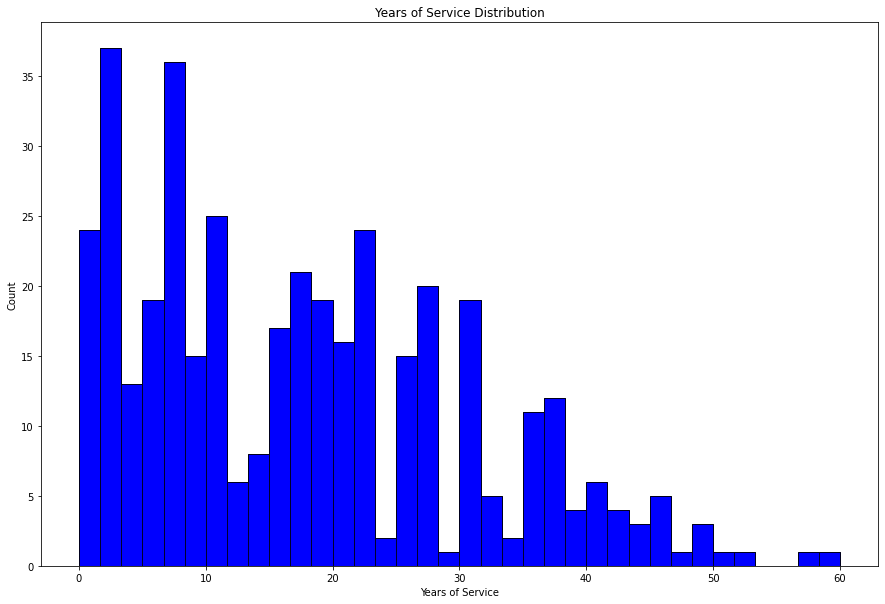

In [9]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(SalaryData['yrs.service'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(SalaryData['yrs.service'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title("Years of Service Distribution")
plt.xlabel("Years of Service")
plt.ylabel("Count")
print(SalaryData['yrs.service'].describe())

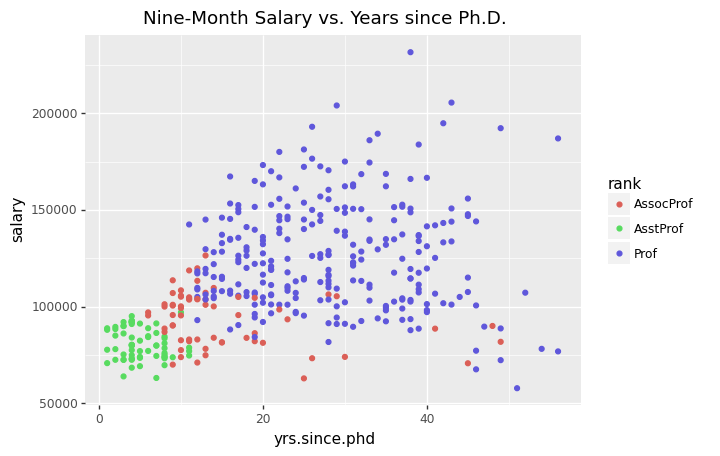

<ggplot: (8769720279574)>

In [10]:
from plotnine import *


ggplot(SalaryData, aes(x='yrs.since.phd', y='salary', 
     color = 'rank')) + geom_point() +\
      ggtitle("Nine-Month Salary vs. Years since Ph.D.")


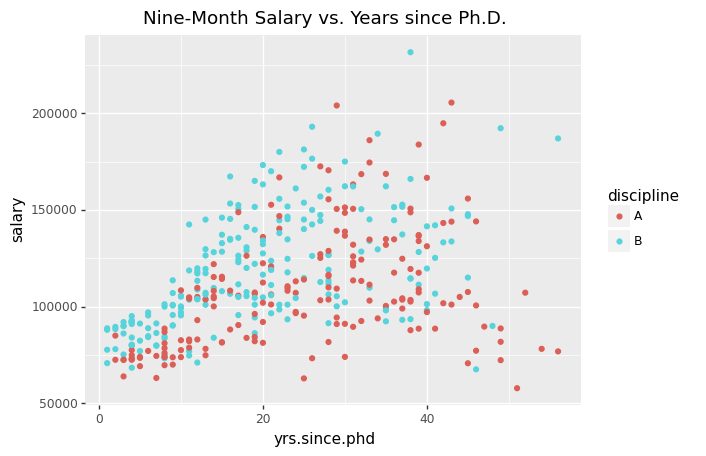

<ggplot: (8769709777079)>

In [11]:
from plotnine import *
matplotlib.rcParams['figure.figsize'] = [20, 25]

ggplot(SalaryData, aes(x='yrs.since.phd', y='salary', 
     color = 'discipline')) + geom_point() +\
      ggtitle("Nine-Month Salary vs. Years since Ph.D.")

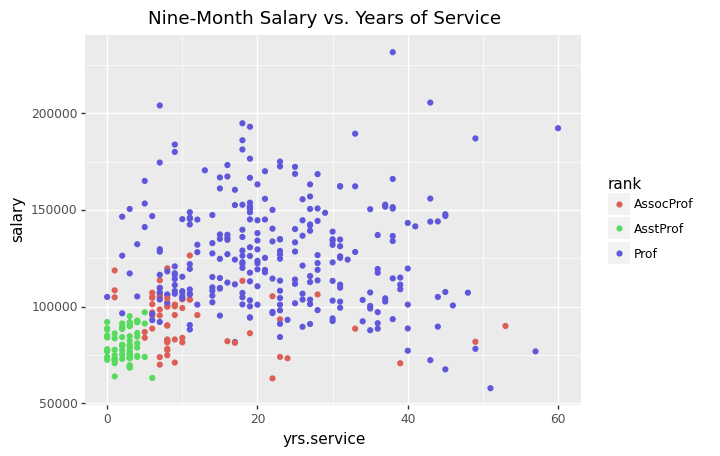

<ggplot: (8769721697179)>

In [12]:
from plotnine import *


ggplot(SalaryData, aes(x='yrs.service', y='salary', 
     color = 'rank')) + geom_point() +\
      ggtitle("Nine-Month Salary vs. Years of Service")

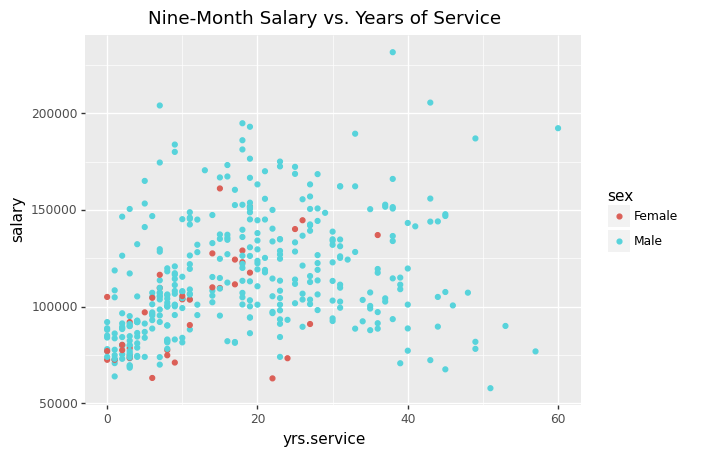

<ggplot: (8769707487815)>

In [13]:

from plotnine import *


ggplot(SalaryData, aes(x='yrs.service', y='salary', 
     color = 'sex')) + geom_point() +\
      ggtitle("Nine-Month Salary vs. Years of Service")


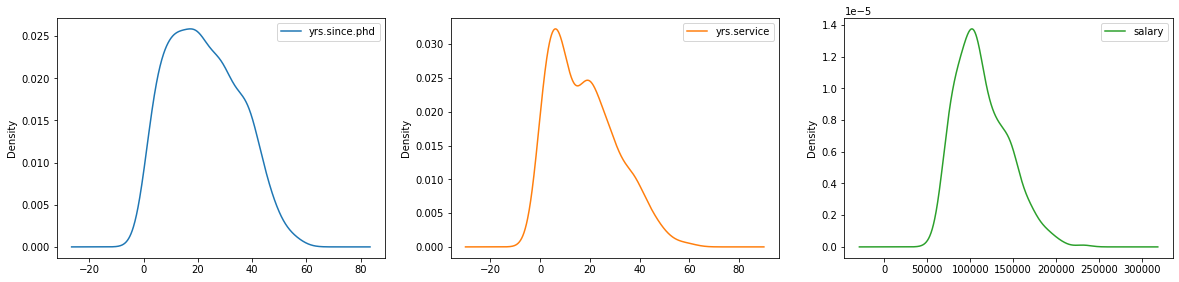

In [14]:
from matplotlib import pyplot

matplotlib.rcParams['figure.figsize'] = [20, 15]

SalaryData.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

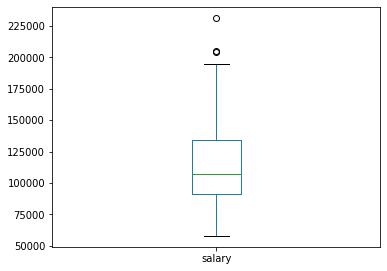

In [15]:
matplotlib.rcParams['figure.figsize'] = [20, 15]

SalaryData['salary'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

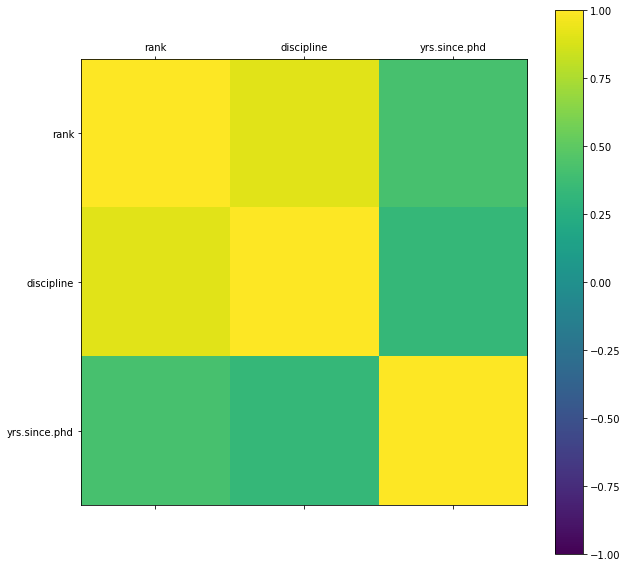

In [16]:

matplotlib.rcParams['figure.figsize'] = [10, 10]
correlations = SalaryData.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

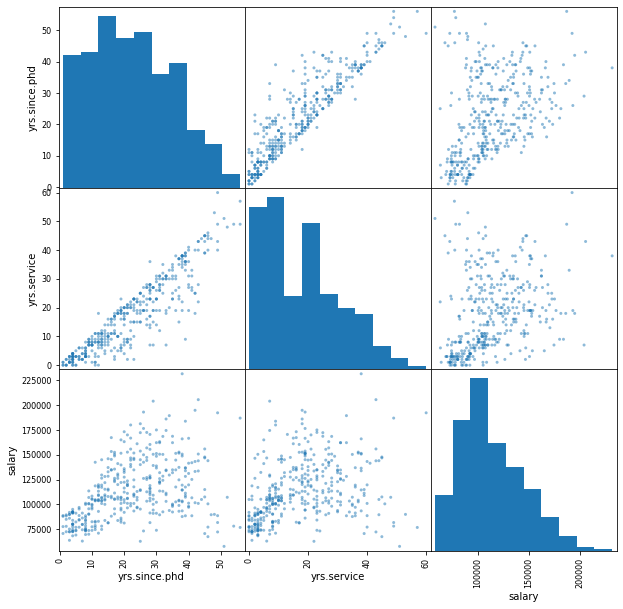

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(SalaryData)
pyplot.show()

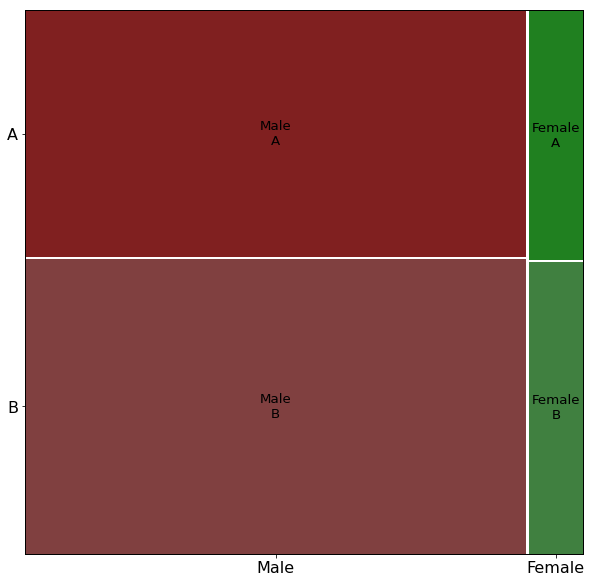

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
matplotlib.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] = 16.0
mosaic(SalaryData, ['sex', 'discipline']);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9db45b6438> has a label of '_' which cannot be automatically added to the legend.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7f9db45b69e8> has a label of '_' which cannot be automatically added to the legend.
  import sys


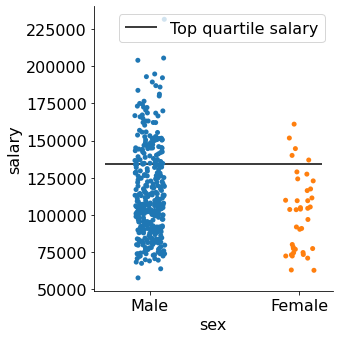

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="sex", y="salary", data=SalaryData)
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.hlines(top_q,xmin=-.3,xmax=1.15)
plt.legend(["_", "_",'Top quartile salary'])

#Prepare Your Data For Machine Learning

In [20]:
SalaryData.salary=pd.cut(SalaryData.salary,bins=[0,top_q,MAX],labels=[0,1])

In [38]:
SalaryData['salary'].value_counts()


0    298
1     99
Name: salary, dtype: int64

In [22]:
SalaryData['sex'] = np.where(SalaryData['sex'].str.contains("Male"), 1, 0)


In [23]:
SalaryData['discipline'] = np.where(SalaryData['discipline'].str.contains("A"), 1, 0)


In [39]:
for i in range(len(SalaryData)):
  if SalaryData['rank'][i]=='Prof':SalaryData['rank'][i]=1
  elif SalaryData['rank'][i]=='AssocProf':SalaryData['rank'][i]=2
  else: SalaryData['rank'][i]=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
SalaryData.head(6)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,3,0,19,18,1,1
1,3,0,20,16,1,1
2,3,0,4,3,1,0
3,3,0,45,39,1,0
4,3,0,40,41,1,1
5,3,0,6,6,1,0


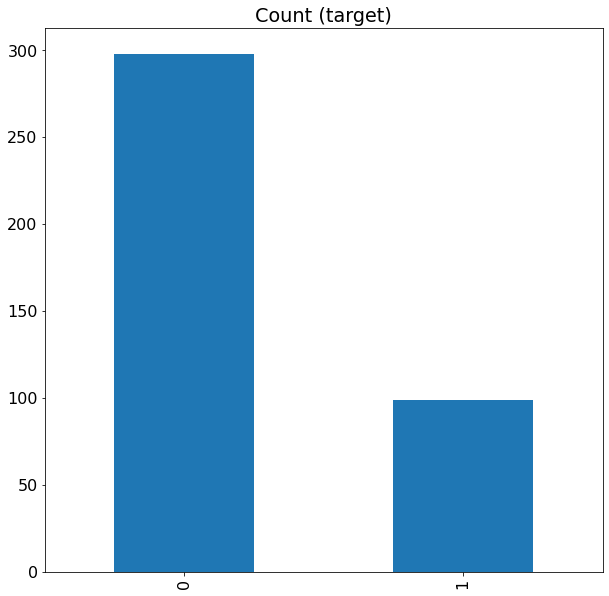

In [26]:
target_count=SalaryData['salary'].value_counts()
target_count .plot(kind='bar', title='Count (target)');


In [41]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Binarizer

# # load data
# array = SalaryData.values
# X = array[:,0:5]
# Y = array[:,5]
# Y=Y.reshape((-1,1))
# Y= Binarizer(threshold=0).fit_transform(Y)
# #Y=np.asarray(SalaryData['salary'], dtype="|S6")
# test = SelectKBest(score_func=chi2, k=5)
# fit = test.fit(X, Y)
# # summarize scores
# set_printoptions(precision=3)
# print(fit.scores_)

#Data Split


In [42]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
test_size = 0.2
seed = 7
array = SalaryData.values
X = array[:,0:5]
Y = array[:,5]
Y=Y.reshape((-1,))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)


In [43]:
msk = np.random.rand(len(SalaryData)) < 0.8
df_train = SalaryData[msk]
df_test = SalaryData[~msk]

In [44]:
# Class count
count_class_0, count_class_1 = df_train.salary.value_counts()

# Divide by class
df_class_0 = df_train[df_train['salary'] == 0]
df_class_1 = df_train[df_train['salary'] == 1]

Random over-sampling:
1    244
0    244
Name: salary, dtype: int64


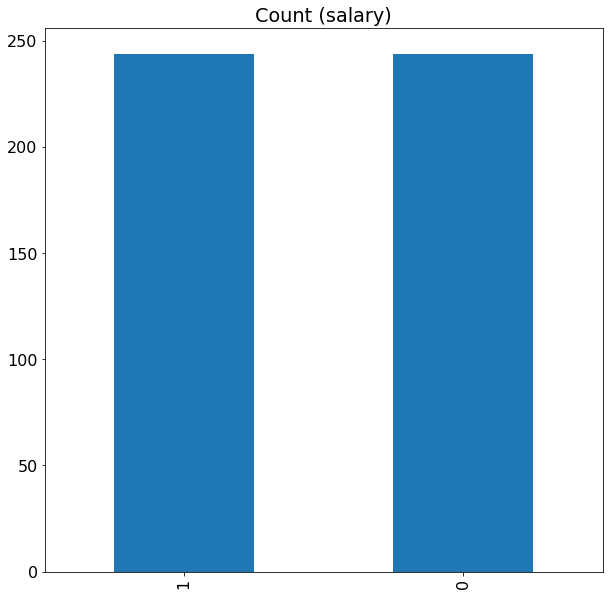

In [46]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.salary.value_counts())

df_test_over.salary.value_counts().plot(kind='bar', title='Count (salary)');

In [48]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
array = df_test_over.values
array1=df_test.values
X_test,Y_test=array1[:,0:5],array1[:,5]
X = array[:,0:5]
Y = array[:,5]
Y=Y.astype('int')
X_train,Y_train=X,Y
Y_train=Y_train.astype('int')

Y_test=Y_test.astype('int')

num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
report = classification_report(Y_test, predicted)
print(report)

0.5652210884353741
[[36 18]
 [ 8 13]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.73        54
           1       0.42      0.62      0.50        21

    accuracy                           0.65        75
   macro avg       0.62      0.64      0.62        75
weighted avg       0.71      0.65      0.67        75



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [49]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledX_ts=scaler.transform(X_test)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.    -0.88  -1.668 -1.281  0.295]
 [ 0.    -0.88   1.578  1.387  0.295]
 [ 0.    -0.88  -0.322 -0.021  0.295]
 [ 0.    -0.88  -0.56  -0.169 -3.393]
 [ 0.    -0.88  -1.035 -0.91   0.295]]


In [50]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, rescaledX, Y_train, cv=kfold)
print("Accuracy:{}  {}".format(results.mean()*100.0, results.std()*100.0))

Accuracy:56.52210884353741  9.788153721890263


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [34]:
# Create function returning a compiled network
# Load libraries
from keras import models,optimizers,layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from  matplotlib.pyplot import subplot
early_stopping_monitor = EarlyStopping(patience=3,restore_best_weights=True,monitor='val_loss')
number_of_features=5
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=1024, activation='relu', input_shape=(number_of_features,)))
    network.add(layers.Dropout(0.2))
    network.add(layers.Dense(units=256, activation='relu'))
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=156, activation='relu'))
    network.add(layers.Dropout(0.2))
    network.add(layers.Dense(units=64, activation='tanh'))
    network.add(layers.Dropout(0.2))
    network.add(layers.Dense(units=16, activation='selu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=adam, # 
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network


# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network,epochs=10,batch_size=32,validation_split=0.2, verbose=1)
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cv_results1 = cross_val_score(neural_network, rescaledX, Y_train, cv=kfold, scoring=None, fit_params={'callbacks': [early_stopping_monitor]})
#cross_val_score(neural_network, X, Y, cv=10)

results,names=[],[]
results.append(cv_results1)
names.append('NN')

msg = "%s: %f (%f)" % ('NN', cv_results1.mean(), cv_results1.std())
print(msg)


Epoch 1/10
8/8 [==============================] - 0s 23ms/step - loss: 0.5577 - accuracy: 0.6711 - val_loss: 0.4758 - val_accuracy: 0.7544
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4906 - accuracy: 0.7281 - val_loss: 0.4756 - val_accuracy: 0.7193
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.6886 - val_loss: 0.4735 - val_accuracy: 0.7544
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4589 - accuracy: 0.7325 - val_loss: 0.4537 - val_accuracy: 0.7193
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.4334 - accuracy: 0.7412 - val_loss: 0.4830 - val_accuracy: 0.7368
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.4348 - accuracy: 0.7412 - val_loss: 0.4785 - val_accuracy: 0.7193
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9062
Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 0.52

In [51]:
# from keras import models
# from keras import layers
# from keras.wrappers.scikit_learn import KerasClassifier
# # Define early_stopping_monitor
# from keras.callbacks import EarlyStopping
# from  matplotlib.pyplot import subplot
# early_stopping_monitor = EarlyStopping(patience=5,restore_best_weights=True,monitor='val_acc')

# number_of_features=4
# network = models.Sequential()

# # Add fully connected layer with a ReLU activation function
# network.add(layers.Dense(units=160, activation='relu', input_shape=(number_of_features,)))
# network.add(layers.Dropout(0.2))
# # Add fully connected layer with a ReLU activation function
# network.add(layers.Dense(units=50, activation='relu'))
# network.add(layers.Dropout(0.2))
# network.add(layers.Dense(units=22, activation='relu'))

# # Add fully connected layer with a sigmoid activation function
# network.add(layers.Dense(units=1, activation='sigmoid'))

# # Compile neural network
# network.compile(loss='binary_crossentropy', # Cross-entropy
#                 optimizer='adam', # 
#                 metrics=['accuracy']) # Accuracy performance metric
# network.fit(X_train,Y_train,batch_size=32,validation_split=0.2, callbacks= 
# [early_stopping_monitor], verbose=1,
#                 epochs=20,shuffle=True)

# _, train_acc = network.evaluate(X_train, Y_train, verbose=0)
# _, test_acc = network.evaluate(X_test, Y_test, verbose=0)
# print('Train:{}, Test:{}' .format(train_acc, test_acc))
# # learning curves of model accuracy
# subplot(111)
# pyplot.plot(network.history.history['acc'], label='train')
# pyplot.plot(network.history.history['val_acc'], label='test')
# pyplot.legend()
# pyplot.show()
# pyplot.title('Accuracy')
# subplot(121)

# pyplot.plot(network.history.history['loss'], label='train')
# pyplot.plot(network.history.history['val_loss'], label='Val')
# pyplot.title('loss')
# pyplot.legend()
# pyplot.show()
# PR=network.predict(rescaledX_ts)
# print(accuracy_score(Y_test,PR.round(), normalize=False))
# print(classification_report(Y_test, PR.round()))
# print(confusion_matrix(Y_test, PR.round()))
# # What about AUROC?
# prob_y_4 = network.predict_proba(rescaledX_ts)
# prob_y_4 = [p[1] for p in prob_y_4]
# print( roc_auc_score(Y_test, prob_y_4) )

NN: 0.731149 (0.112454)
LR: 0.665901 (0.046258)
LDA: 0.682270 (0.048331)
KNN: 0.785077 (0.045946)
CART: 0.873172 (0.050409)
NB: 0.690349 (0.052681)
SVM: 0.739796 (0.051461)


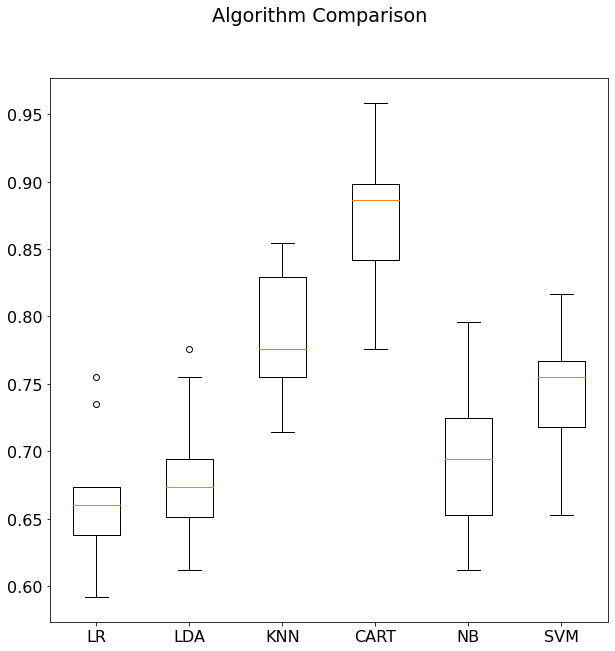

In [52]:
# Compare Algorithms

from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results,names=[],[]
# evaluate each model in turn
msg = "%s: %f (%f)" % ('NN', cv_results1.mean(), cv_results1.std())
print(msg)
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model, rescaledX, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


# boxplot algorithm comparison
matplotlib.rcParams['figure.figsize'] = [10, 10]

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [53]:
from sklearn.metrics import roc_auc_score

rf = KNeighborsClassifier()

rf.fit(rescaledX,Y_train)
PR=rf.predict(rescaledX_ts)
print(accuracy_score(PR,Y_test))
print(classification_report(Y_test, PR))
print(confusion_matrix(Y_test, PR))
# What about AUROC?
prob_y_4 = rf.predict_proba(rescaledX_ts)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(Y_test, prob_y_4) )


0.6533333333333333
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        54
           1       0.42      0.67      0.52        21

    accuracy                           0.65        75
   macro avg       0.63      0.66      0.62        75
weighted avg       0.72      0.65      0.67        75

[[35 19]
 [ 7 14]]
0.718694885361552


In [60]:
model = DecisionTreeClassifier()
model.fit(rescaledX,Y_train)
PR=model.predict(rescaledX_ts)
print(accuracy_score(PR,Y_test))
print(classification_report(Y_test, PR))
confusion_matrix(Y_test, PR)

0.6933333333333334
              precision    recall  f1-score   support

           0       0.84      0.70      0.77        54
           1       0.47      0.67      0.55        21

    accuracy                           0.69        75
   macro avg       0.66      0.69      0.66        75
weighted avg       0.74      0.69      0.71        75



array([[38, 16],
       [ 7, 14]])

[0.    0.037 0.513 0.421 0.029]
Variable: yrs.since.phd        Importance: 0.51
Variable: yrs.service          Importance: 0.42
Variable: discipline           Importance: 0.04
Variable: sex                  Importance: 0.03
Variable: rank                 Importance: 0.0


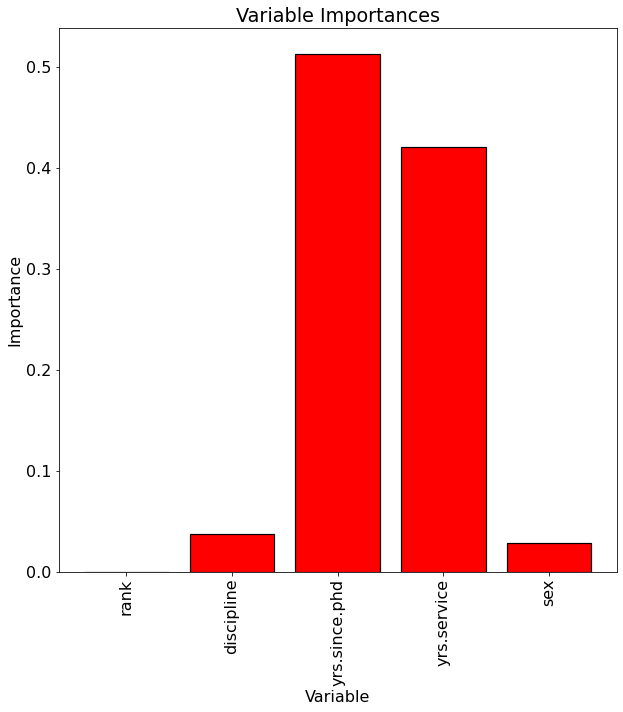

In [61]:
from sklearn.ensemble import RandomForestClassifier

# feature extraction
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)
print(model.feature_importances_)
# Get numerical feature importances
feature_list = list(SalaryData.columns)
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');



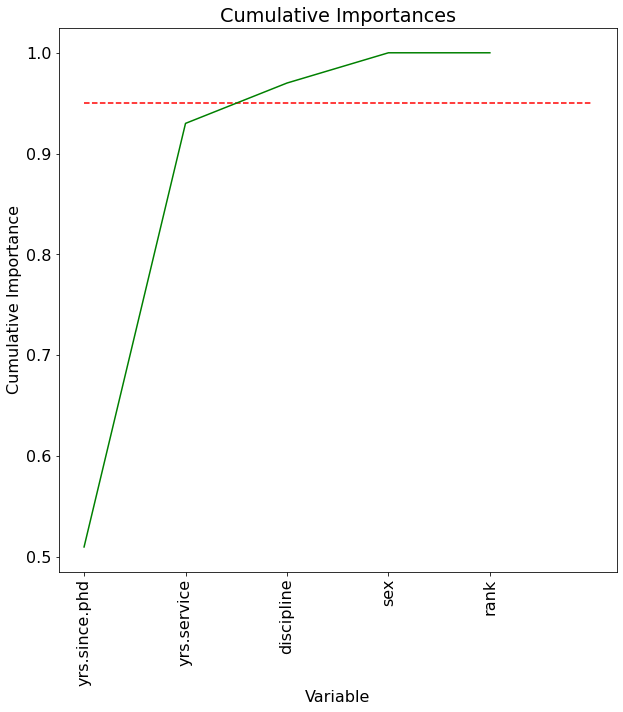

In [62]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [63]:

X_train1=np.delete(X_train, np.s_[4], axis=1)                       # remove columns 2 and 5
X_test1=np.delete(X_test, np.s_[4], axis=1) 

scaler = StandardScaler().fit(X_train1)
rescaledX1 = scaler.transform(X_train1)
rescaledX1_ts=scaler.transform(X_test1)


In [86]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = list(range(1,6))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
#max_depth.append( 'auto')
# Minimum number of samples required to split a node
min_samples_split = list(range(50))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(100))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [1, 125, 250, 375, 500], 'max_features': [1, 2, 3, 4, 5], 'max_depth': [5, 16, 27, 38, 50], 'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_leaf': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'bootstrap': [True, False]}


In [69]:
Y_train


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rescaledX=rescaledX.astype(float)
rf = RandomForestClassifier(random_state = 7)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(rescaledX, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [88]:
rf_random.best_params_


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 27,
 'n_estimators': 375}

In [89]:
from sklearn.metrics import roc_auc_score
import random

rf = RandomForestClassifier(bootstrap= False,
 max_depth= 50,
 max_features= 3,
 min_samples_leaf= 11,
 min_samples_split= 27,
 n_estimators= 375,random_state = 42)

rf.fit(rescaledX,Y_train)
PR=rf.predict(rescaledX_ts)
print(accuracy_score(PR,Y_test))
print(classification_report(Y_test, PR))
print(confusion_matrix(Y_test, PR))
# What about AUROC?
prob_y_4 = rf.predict_proba(rescaledX_ts)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(Y_test, prob_y_4) )

0.6266666666666667
              precision    recall  f1-score   support

           0       0.88      0.56      0.68        54
           1       0.41      0.81      0.55        21

    accuracy                           0.63        75
   macro avg       0.65      0.68      0.62        75
weighted avg       0.75      0.63      0.64        75

[[30 24]
 [ 4 17]]
0.7354497354497355


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.735


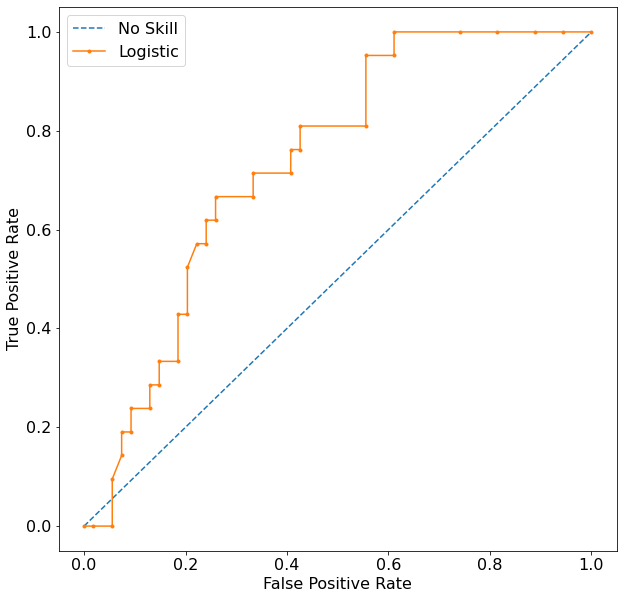

In [90]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
# fit a model
# predict probabilities
lr_probs = rf.predict_proba(rescaledX_ts)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

RF: f1=0.435 auc=0.420


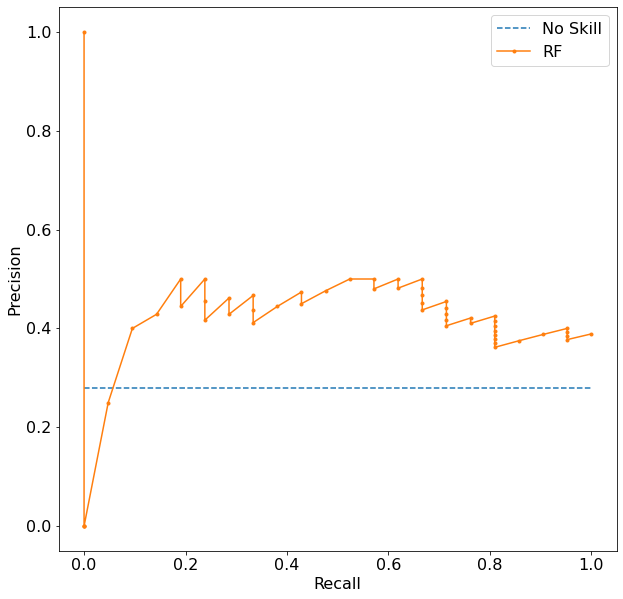

In [91]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_probs = rf.predict_proba(rescaledX_ts)

lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(rescaledX_ts)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
lr_f1, lr_auc = f1_score(Y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RF')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [92]:
from sklearn.metrics import precision_score, recall_score
print("Precision score: {}".format(precision_score(Y_test,PR)))
print("Recall score: {}".format(recall_score(Y_test,PR)))
print("F1 Score: {}".format(f1_score(Y_test,PR)))


Precision score: 0.4146341463414634
Recall score: 0.8095238095238095
F1 Score: 0.5483870967741935
